#### Written by: Rishi Raj Dutta
#### Date: 10/10/2019
#### Dataset used: Titanic - Machine Learning from Disaster
#### Source: https://www.kaggle.com/c/titanic/overview
#### NUID - 001825928
#### Course: INFO 6105
#### Professor: Ram Hariharan

## Introduction

###### Dataset background : 
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this assignment, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


###### ML Algorithm used: KNN Classification Model

###### Tasks to be performed: 
> Understand the problem and Module Imports
    
> Reading Data into the Notebook

> Train - Valid - Test split

> Data Pre-processing

> Hyperparameter tuning

> Saving the model to disk

###### Assignment objectives:

> 1.	The k-nearest neighbor (k-NN) algorithm has hyper-parameters in addition to the value of k. Use the titanic dataset to simultaneously tune the values of more than one hyper-parameter. E.g. value of k, weight, and metric. You can either do nested for loops for this, or use the grid search function from scikit-learn. Recommendation is you submit code inside of a Jupyter notebook.
> 2.	Can you use the k-nearest neighbors for regression? If so, how would the target variable values be calculated or predicted a k-NN regressor?
> 3.	What do you think some of the disadvantages of k-NN algorithm are?



Import all necessary packages

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

%matplotlib inline

'''Define a variable that points to the folder where data is stored'''

In [2]:
my_path = '/Users/rishi/Desktop/Fall 2019/Data Science Engg Methods and Tools/Datasets'

Reading the dataset

In [3]:
my_df = pd.read_csv(f'{my_path}/Titanic_full.csv')
print(my_df.shape)
my_df.head(3)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The Dataset has 1309 rows and 12 columns

Displaying all the 12 columns below: 

In [4]:
my_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From above we can infer that the column "Survived" is our dependant variable also known as the "outcome variable". We are going to predict this column on the basis of independant columns such as "Pclass, Name, Sex, Age, Fare, etc" which we consider is adding value to our predictions

### Splitting the dataset into Training set, Validation set, and Testing set.

Good machine learning practice is important. To do this,we split 
the data into three non-overlapping sets in a 70-15-15 manner.

> (1) ~70% of the data rows go into the training set. 

> (2) ~15% of the data goes into the validation set. Used for evaluating 
model performance as you manually change or set the model hyperparameters 
(e.g. Value of k in k-NN algorithm).

>(3) Final 15% of the datarows is the test set. This dataset is 
never "seen" by the model during model building or hyperparamter tuning.
Sometimes these two sets are called holdout sets.

The model's final performance before sending it to production, will be
evaluated on this test data set.

Now we create a splitting fuction which has two parameters (dataframe, no of rows to split the dataframe into).
And returns a training set and a validation set of the ratio 70:30

So 30% of 1309 rows is: 

In [5]:
valid = (30*1309)/100
valid

392.7

And 70% of 1309 is:

In [6]:
train = (1309 - 392)
train

917

In [7]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

Printing the distribution of Training and Validation sets:

In [8]:
mydf_train,mydf_valid_test = mydf_splitter(my_df,(1309-392))
print(mydf_train.shape,mydf_valid_test.shape)

(917, 12) (392, 12)


In [9]:
#Verify the training data
mydf_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
#Verify the validation data
mydf_valid_test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
917,918,0,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
918,919,0,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C


Now splitting the 30% validation set into validation and testing set with a ratio of 50:50

In [11]:
test = 392/2
test

196.0

In [12]:
mydf_valid,mydf_test = mydf_splitter(mydf_valid_test,196)
print(mydf_valid.shape,mydf_test.shape)

(196, 12) (196, 12)


In [13]:
#Verify the valid data
mydf_valid.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
917,918,0,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
918,919,0,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C


In [14]:
#Verify the valid data
mydf_test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1113,1114,0,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,F33,S
1114,1115,0,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S


'''Writing out test data to a folder. We will use it only for final model
performance evaluation'''

In [15]:
new_path = '/Users/rishi/Desktop/Fall 2019/Data Science Engg Methods and Tools/Datasets'
mydf_test.to_csv(f'{new_path}/Titanic_test.csv',index = False)

## Pre-processing the Data

First we check the distribution of Null values in our training set.

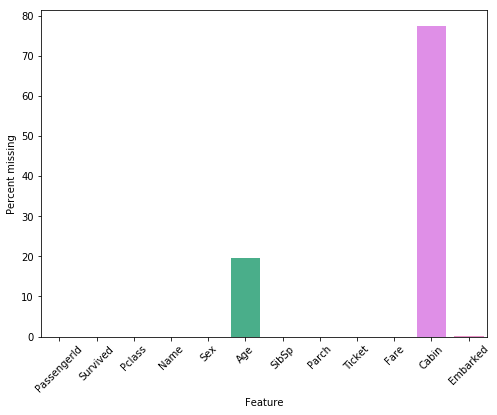

In [16]:
null_vals = mydf_train.isnull().sum()/len(mydf_train)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

From the above plot 

(1) Cabin has ~80% missing values. It can be challenging to "fill in" or impute so many missing values. Let's try dropping the column "Cabin".

(2) Age has ~20% missing values. We'll try to impute these.

(3) Embarked column have very little missing values. We will impute these values.

(4) If the target variable (Survived) had any missing values, then those rows would have to be removed for pure supervised learning (like our current endeavor). But we don't seem to have any null values in the Survived column.


In [17]:
mydf_train_1 = mydf_train.drop("Cabin",axis = 1)
print(mydf_train_1.shape)
mydf_train_1.head(2)

(917, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


Now let's us impute the age column null values with the mean of the column.

In [18]:
mydf_train_1['Age'] = mydf_train_1['Age'].fillna(mydf_train_1['Age'].mean())

In [19]:
mydf_train_1['Embarked'].count()

915

In [20]:
mydf_train_1['Embarked'].isnull().sum()

2

The Embarked columns has 915 rows in the training set and only two rows have null values, so we can drop those two records. It will not cause any impact on our model.

Keeping the dataframe with valid entries in the same variable.

In [21]:
mydf_train_1 = mydf_train_1.dropna(axis = 0, subset=['Embarked'])

Now that we have dealt with all the null values in our training dataset. Lets start converting object type data into categorical data.

In [22]:
#Check types of each column with the dataframe info () method
mydf_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 916
Data columns (total 11 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Sex            915 non-null object
Age            915 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Embarked       915 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 85.8+ KB


Using Pandas function  

Series.astype(self, dtype, copy=True, errors='raise', **kwargs)

to Cast a pandas object to a specified dtype dtype.

In [23]:
# limit to categorical data using df.select_dtypes()
mydf_train_3 = mydf_train_1.select_dtypes(include=[object])
mydf_train_3.head(3)

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mydf_train_3 = mydf_train_3.apply(le.fit_transform)
mydf_train_3.head(3)

,Name,Sex,Ticket,Embarked
0,111,1,536,2
1,195,0,611,0
2,360,0,685,2


OneHotEncoder

>Encode categorical integer features using a one-hot aka one-of-K scheme.

>The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features.

>The output will be a sparse matrix where each column corresponds to one possible value of one feature.

>It is assumed that input features take on values in the range [0, n_values).

>This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [25]:
#Create a OneHotEncoder object, and fit it to all of mydf_train_1
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

enc.fit(mydf_train_3)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [26]:
# 3. Transform
mydf_train_4 = enc.transform(mydf_train_3)
mydf_train_4.shape

(915, 1615)

In [27]:
mydf_train_4

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

### Model building 

Now, let's separate the X and Y variables (vertical split of the 
dataframe). Here the Y column is the variable we are trying to predict, 
survived or not(0 = No, 1 = Yes)


In [28]:
mydf_train_3.head(2)

,Name,Sex,Ticket,Embarked
0,111,1,536,2
1,195,0,611,0


In [29]:
mydf_train_1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [30]:
#mydf_train_2 = mydf_train_1

mydf_train_2 = mydf_train_1.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1)

mydf_train_2 = pd.concat([mydf_train_2, mydf_train_3], axis=1, join='inner')

mydf_train_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,111,1,536,2
1,2,1,1,38.0,1,0,71.2833,195,0,611,0
2,3,1,3,26.0,0,0,7.9250,360,0,685,2
3,4,1,1,35.0,1,0,53.1000,279,0,48,2
4,5,0,3,35.0,0,0,8.0500,16,1,483,2


Now we have a dataset with categorical features hot encoded.

So, let us now split the dependant and independant variables

In [31]:
Y_train = mydf_train_2["Survived"]
X_train = mydf_train_2.drop(["Survived"],axis = 1)

Standardize the continuous variables. One way to do this:

(1) We calculate the arithmetic mean (AM) and standard deviation (SD)
of that column,
(2) subtract the AM from each value to get a new value
(3) divide the new value by the SD

Please see preprocessing under scikit-learn page for more information.
Here, the two continuous variable columns are (a) Age and, (b) Fare


In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train_1 = pd.DataFrame(X_train)
sc.fit(X_train[["Age","Fare"]])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
X_train[["Age","Fare"]] = sc.transform(X_train[["Age","Fare"]])
X_train.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,3,-0.598402,1,0,-0.499681,111,1,536,2
1,2,1,0.629997,1,0,0.788832,195,0,611,0
2,3,3,-0.291302,0,0,-0.486098,360,0,685,2


### Now let us pre-process the validation dataset

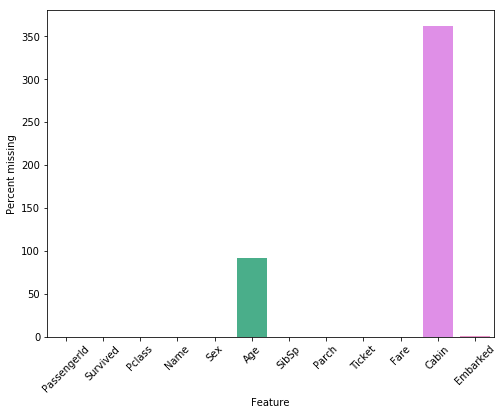

In [37]:
null_vals = mydf_train.isnull().sum()/len(mydf_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [38]:
mydf_valid_1 = mydf_valid.drop("Cabin",axis = 1)
print(mydf_valid_1.shape)
mydf_valid_1.head(2)

(196, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
917,918,0,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C
918,919,0,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,C


In [39]:
mydf_valid_1['Age'] = mydf_valid_1['Age'].fillna(mydf_valid_1['Age'].mean())

In [40]:
mydf_valid_1['Embarked'].count()

196

In [41]:
mydf_valid_1['Embarked'].isnull().sum()

0

In [42]:
mydf_valid_1 = mydf_valid_1.dropna(axis = 0, subset=['Embarked'])

In [62]:
mydf_valid_1 = mydf_valid_1.dropna(axis = 0, subset=['Fare'])

In [65]:
#Check types of each column with the dataframe info () method
mydf_valid_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 917 to 1112
Data columns (total 11 columns):
PassengerId    195 non-null int64
Survived       195 non-null int64
Pclass         195 non-null int64
Name           195 non-null object
Sex            195 non-null object
Age            195 non-null float64
SibSp          195 non-null int64
Parch          195 non-null int64
Ticket         195 non-null object
Fare           195 non-null float64
Embarked       195 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 18.3+ KB


In [66]:
# limit to categorical data using df.select_dtypes()
mydf_valid_3 = mydf_valid_1.select_dtypes(include=[object])
mydf_valid_3.head(3)

,Name,Sex,Ticket,Embarked
917,"Ostby, Miss. Helene Ragnhild",female,113509,C
918,"Daher, Mr. Shedid",male,2698,C
919,"Brady, Mr. John Bertram",male,113054,S


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mydf_valid_3 = mydf_valid_3.apply(le.fit_transform)
mydf_valid_3.head(3)

,Name,Sex,Ticket,Embarked
917,136,0,5,0
918,51,1,62,0
919,22,1,3,2


In [68]:
#Create a OneHotEncoder object, and fit it to all of mydf_train_1
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

enc.fit(mydf_valid_3)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [69]:
# 3. Transform
mydf_valid_4 = enc.transform(mydf_valid_3)
mydf_valid_4.shape

(195, 381)

In [70]:
mydf_valid_4

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [71]:
mydf_valid_3.head(2)

,Name,Sex,Ticket,Embarked
917,136,0,5,0
918,51,1,62,0


In [72]:
mydf_valid_1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
917,918,0,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C
918,919,0,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,C


In [73]:
#mydf_train_2 = mydf_train_1

mydf_valid_2 = mydf_valid_1.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1)

mydf_valid_2 = pd.concat([mydf_valid_2, mydf_valid_3], axis=1, join='inner')

mydf_valid_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
917,918,0,1,22.000000,0,1,61.9792,136,0,5,0
918,919,0,3,22.500000,0,0,7.2250,51,1,62,0
919,920,1,1,41.000000,0,0,30.5000,22,1,3,2
920,921,0,3,30.162288,2,0,21.6792,157,1,55,0
921,922,0,2,50.000000,1,0,26.0000,113,1,169,2


In [74]:
Y_valid = mydf_valid_2["Survived"]
X_valid = mydf_valid_2.drop(["Survived"],axis = 1)

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train_1 = pd.DataFrame(X_train)
sc.fit(X_valid[["Age","Fare"]])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
X_valid[["Age","Fare"]] = sc.transform(X_valid[["Age","Fare"]])
X_valid.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
917,918,1,-0.651672,0,1,0.414561,136,0,5,0
918,919,3,-0.610976,0,0,-0.518206,51,1,62,0
919,920,1,0.894751,0,0,-0.121704,22,1,3,2


### Fitting the training set to KNN model

In [34]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [91]:
#Predict on the validation set
Y_pred = classifier.predict(X_valid)

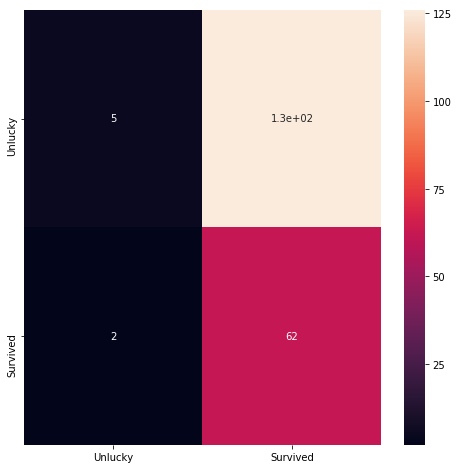

In [92]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_valid,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["Unlucky","Survived"],
            yticklabels = ["Unlucky","Survived"],annot = True)

Let us calculate the accuracy of our KNN model

In [100]:
print('Accuracy score = ')
print(accuracy_score(Y_valid,Y_pred))
print('Matthews Coefficient = ')
print(matthews_corrcoef(Y_valid,Y_pred))
print('F1 score = ')
print(f1_score(Y_valid,Y_pred))

Accuracy score = 
0.34358974359
Matthews Coefficient = 
0.0174612131611
F1 score = 
0.492063492063


## Hyper parameter tuning

In [101]:
'''Determining the optimal value of k for k-NN on the Titanic dataset'''

num_neighs = list()
accuracy_list = list()


for neighbor in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = neighbor,weights = 'uniform')
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_valid)
    accuracy = accuracy_score(Y_valid,Y_pred)
    num_neighs.append(neighbor)
    accuracy_list.append(accuracy)

In [102]:
'''Print it out as a table'''
eval_df =  pd.DataFrame({"Num of neighbors": num_neighs,"Valid accuracy Score": accuracy_list})
eval_df

,Num of neighbors,Valid accuracy Score
0,1,0.502564
1,2,0.517949
2,3,0.358974
3,4,0.389744
4,5,0.343590
5,6,0.364103
6,7,0.338462
7,8,0.343590
8,9,0.338462
9,10,0.348718


#### So, we can see that for 2 neighbours the accuracy score is the highest. 

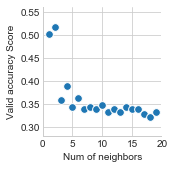

In [116]:
#Plot the above as an accuracy Vs validation set accuracy of the model
sns.set_style("whitegrid")
sns.pairplot(eval_df,x_vars = "Num of neighbors",
             y_vars = "Valid accuracy Score",plot_kws = {'s': 60})

'''Congrats, K = 2 seems to give the best validation 
set accuracy (= 0.51) !!! We will use this value to train our final
model. OK, so how do we save this trained and 
hyperparameter tuned model for later use? First, we club together, the
train and valid set. Then, we make and 
train a model with K = 2. Then save it with joblib, which we imported 
earlier. Finally, we preprocess the test set and evaluate this model.'''

In [117]:

X_train_full = pd.concat([X_train,X_valid],ignore_index = True)
print(X_train_full.shape)
X_train_full.head(2)

(1110, 10)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,3,-0.598402,1,0,-0.499681,111,1,536,2
1,2,1,0.629997,1,0,0.788832,195,0,611,0


Do the same for Y

In [118]:

Y_train_full = pd.concat([Y_train,Y_valid],ignore_index = True)
print(Y_train_full.shape)

(1110,)


In [119]:
knn_model_fin = KNeighborsClassifier(n_neighbors = 2,weights = 'uniform')
knn_model_fin.fit(X_train_full,Y_train_full)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [121]:
Y_test_pred = classifier.predict(X_train_full)

accuracy = accuracy_score(Y_train_full,Y_test_pred)
print(accuracy)

0.612612612613


In [122]:
!mkdir knn_model
knn_model_name = '/Users/rishi/Desktop/Fall 2019/Data Science Engg Methods and Tools/Datasets/knn_model_final.sav'
joblib.dump(knn_model_fin,knn_model_name)

['/Users/rishi/Desktop/Fall 2019/Data Science Engg Methods and Tools/Datasets/knn_model_final.sav']

### Finally we preprocess the test set and implement the model on it

In [123]:
mydf_test = pd.read_csv(f'{my_path}/Titanic_test.csv')
print(mydf_test.shape)
mydf_test.head(3)

(196, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1114,0,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,F33,S
1,1115,0,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S
2,1116,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C


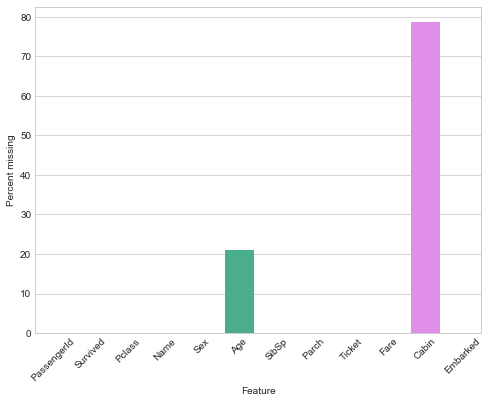

In [124]:
null_vals = mydf_test.isnull().sum()/len(mydf_test)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

So, only Cabin and Age have null values. 

In [125]:
mydf_test = mydf_test.drop("Cabin",axis = 1)
print(mydf_test.shape)
mydf_test.head(2)

(196, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1114,0,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,S
1,1115,0,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,S


In [126]:
mydf_test['Age'] = mydf_test['Age'].fillna(mydf_test['Age'].mean())

In [129]:
mydf_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Our test set is clean and has no null values

In [130]:
#Check types of each column with the dataframe info () method
mydf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
PassengerId    196 non-null int64
Survived       196 non-null int64
Pclass         196 non-null int64
Name           196 non-null object
Sex            196 non-null object
Age            196 non-null float64
SibSp          196 non-null int64
Parch          196 non-null int64
Ticket         196 non-null object
Fare           196 non-null float64
Embarked       196 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 16.9+ KB


In [131]:
# limit to categorical data using df.select_dtypes()
mydf_test_3 = mydf_test.select_dtypes(include=[object])
mydf_test_3.head(3)

,Name,Sex,Ticket,Embarked
0,"Cook, Mrs. (Selena Rogers)",female,W./C. 14266,S
1,"Karlsson, Mr. Einar Gervasius",male,350053,S
2,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,PC 17606,C


In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mydf_test_3 = mydf_test_3.apply(le.fit_transform)
mydf_test_3.head(3)

,Name,Sex,Ticket,Embarked
0,35,0,182,2
1,90,1,103,2
2,23,0,160,0


In [133]:
#Create a OneHotEncoder object, and fit it to all of mydf_train_1
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)

enc.fit(mydf_test_3)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

In [134]:
# 3. Transform
mydf_test_4 = enc.transform(mydf_test_3)
mydf_test_4.shape

(196, 385)

In [135]:
mydf_test_4

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [136]:
mydf_test_3.head(2)

,Name,Sex,Ticket,Embarked
0,35,0,182,2
1,90,1,103,2


In [137]:
mydf_test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1114,0,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,S
1,1115,0,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,S


In [139]:
#mydf_train_2 = mydf_train_1

mydf_test_2 = mydf_test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1)

mydf_test_2 = pd.concat([mydf_test_2, mydf_test_3], axis=1, join='inner')

print(mydf_test_2.shape)
mydf_test_2.head()

(196, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1114,0,2,22.000000,0,0,10.5000,35,0,182,2
1,1115,0,3,21.000000,0,0,7.7958,90,1,103,2
2,1116,1,1,53.000000,0,0,27.4458,23,0,160,0
3,1117,0,3,29.807548,0,2,15.2458,122,0,52,0
4,1118,1,3,23.000000,0,0,7.7958,10,1,104,2


In [140]:
Y_test = mydf_test_2["Survived"]
X_test = mydf_test_2.drop(["Survived"],axis = 1)

In [141]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train_1 = pd.DataFrame(X_train)
sc.fit(X_test[["Age","Fare"]])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
X_test[["Age","Fare"]] = sc.transform(X_test[["Age","Fare"]])
X_test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1114,2,-2.444307,0,0,-0.647197,35,0,182,2
1,1115,3,-2.450757,0,0,-0.648143,90,1,103,2
2,1116,1,-2.244349,0,0,-0.641268,23,0,160,0


In [144]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [145]:
#Predict on the validation set
Y_pred = classifier.predict(X_test)

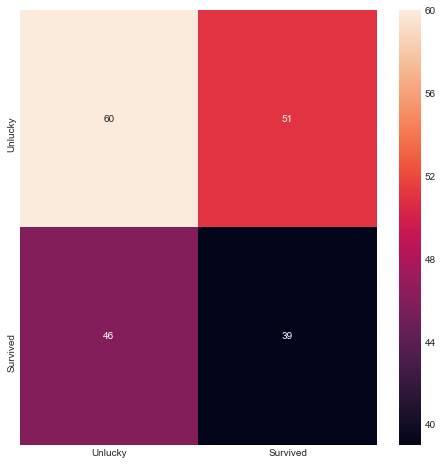

In [146]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_test,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["Unlucky","Survived"],
            yticklabels = ["Unlucky","Survived"],annot = True)

In [147]:
print('Accuracy score = ')
print(accuracy_score(Y_test,Y_pred))
print('Matthews Coefficient = ')
print(matthews_corrcoef(Y_test,Y_pred))
print('F1 score = ')
print(f1_score(Y_test,Y_pred))

Accuracy score = 
0.505102040816
Matthews Coefficient = 
-0.000632420749849
F1 score = 
0.445714285714


## So our model gives an accuracy of 50% on the unbaised test dataset

In [162]:
num_neighs_test = list()
accuracy_list_test = list()


for neighbor in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = neighbor,weights = 'uniform')
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    num_neighs_test.append(neighbor)
    accuracy_list_test.append(accuracy)

In [163]:
'''Print it out as a table'''
eval_df_test =  pd.DataFrame({"Num of neighbors": num_neighs_test,"Valid accuracy Score": accuracy_list_test})
eval_df_test

,Num of neighbors,Valid accuracy Score
0,1,0.494898
1,2,0.505102
2,3,0.433673
3,4,0.494898
4,5,0.433673
5,6,0.448980
6,7,0.443878
7,8,0.459184
8,9,0.448980
9,10,0.448980


## Yes, KKN can be used for regression

## Implementing GridsearchCV 

for finding the best value of K

In [173]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]}
#param = eval_df_test['Num of neighbors']
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=2)
model.fit(X_test,Y_test)
model.best_params_

{'n_neighbors': 16}

### Now i will be implementing KNN by tuning the metric hyper parameter and use "minkowski" as metric

In [175]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [179]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [180]:
print('Accuracy score = ')
print(accuracy_score(Y_test,y_pred))

Accuracy score = 
0.505102040816


### Now i will be implementing KNN by tuning the weight hyper parameter and use "distance" as weight. 
#### distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [181]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, weights='distance', metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred_1 = classifier.predict(X_test)

print('Accuracy score = ')
print(accuracy_score(Y_test,y_pred_1))

Accuracy score = 
0.494897959184


In [183]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, weights='distance', metric = 'minkowski', p = 2, algorithm='ball_tree')
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred_1 = classifier.predict(X_test)

print('Accuracy score = ')
print(accuracy_score(Y_test,y_pred_1))

Accuracy score = 
0.494897959184


## Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

5. Need to determine the value of K.

6. The main disadvantage of the KNN algorithm is that it is a lazy learner, i.e. it does not learn anything from the training data and simply uses the training data itself for classification

In [184]:
!mkdir knn_model
knn_model_name = '/Users/rishi/Desktop/Fall 2019/Data Science Engg Methods and Tools/Datasets/knn_model_final_finished.sav'
joblib.dump(classifier,knn_model_name)

A subdirectory or file knn_model already exists.


['/Users/rishi/Desktop/Fall 2019/Data Science Engg Methods and Tools/Datasets/knn_model_final_finished.sav']